## Exercise 3 : Linear Regression (deadline 12.03.2024)


## Note: please complete the tasks in this file, and rename the file as "Exercise_03_FirstName_LastName.ipynb"


In this exercise session we will see how to perform one- and multidimensional regression tasks on a given dataset.
We will learn to use the python libraries **scipy.stats** as well as **statsmodels** to find regression parameters and their statistics. More information on the given libraries can be found in the following websites:

https://docs.scipy.org/doc/scipy/reference/stats.html

https://www.statsmodels.org/stable/index.html


Depending on the environment you are using, **statsmodels** can be installed (via terminal) by typing
- __*pip3 install statsmodels*__

In [1]:
# Load all dependencies
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
%matplotlib inline

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


First, we have to generate some sample data x and y to explore **stats.linregress** functionalities. It facilitates calculating a linear least-squares regression for two sets of measurements. **x** here is an evenly spaced values between 0 and 200, whereas **y** is a function of x and its intercept is normally distributed random numbers with the same size as x.

In [2]:
# set up some sample data
x = np.arange(200)
y = 2.5 * x + np.random.normal(0, 10, x.shape)

# linear regression fit
s, inter, r_value, p_value, std_err = stats.linregress(x, y)

print('slope:\t', round(s, 3))
print('inter:\t', round(inter, 3))
print('r2 val:\t', round(r_value**2, 3))
print('p  val:\t', p_value)
print('std:\t', round(std_err, 3))

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
slope:	 2.508
inter:	 -1.127
r2 val:	 0.994
p  val:	 6.483617478337857e-224
std:	 0.014


The return value of **stats.linregress** acts like a namedtuple of length 5, with fields slope, intercept, rvalue, pvalue and stderr. Furthermore, we create scatter plot of x vs. y overlaid with extracted fitting line, and residuals plot (difference between fitted plot and original data),

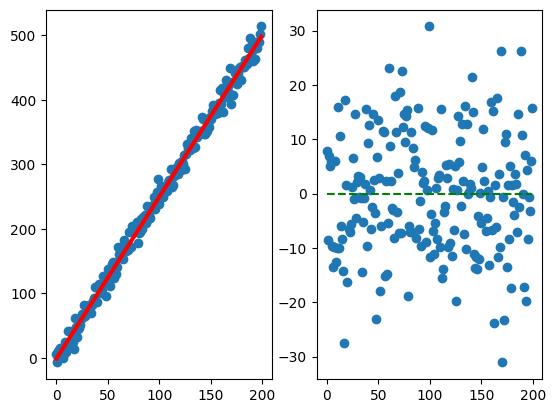

In [3]:
# plotting and comparison
line = s * x + inter
f, (ax0, ax1) = plt.subplots(1, 2)
ax0.scatter(x, y)
ax0.plot(x, line, lw=3, color='red')

# plot the residuals
ax1.scatter(x, y-line)
ax1.plot(x, np.zeros_like(x), 'g--')

Now we do the same operations but with **statsmodels** package. This will be done by creating a dataframe including x and y using **pandas**. Detailed output from **statsmodels.formula.api.ols** can be printed in the form of summary.

In [4]:
import pandas as pd
import statsmodels.formula.api as sm

In [5]:
# set up some sample data
x = np.arange(200)
y = 2.5 * x + np.random.normal(0, 10, x.shape)
df = pd.DataFrame({'x': x, 'y': y})
# linear regression fit
reg = sm.ols(formula='y ~ x', data=df).fit()
print(reg.summary())

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.996
Model:                            OLS   Adj. R-squared:                  0.996
Method:                 Least Squares   F-statistic:                 4.617e+04
Date:                Tue, 12 Mar 2024   Prob (F-statistic):          1.48e-236
Time:                        16:49:33   Log-Likelihood:                -732.26
No. Observations:                 200   AIC:                             1469.
Df Residuals:                     198   BIC:                             1475.
Df Model:                           1                                         
Covariance Type:            nonrobust  

slope:	 2.4903075720983354
inter:	 0.922682844997583
r2 val:	 0.9957297036590882


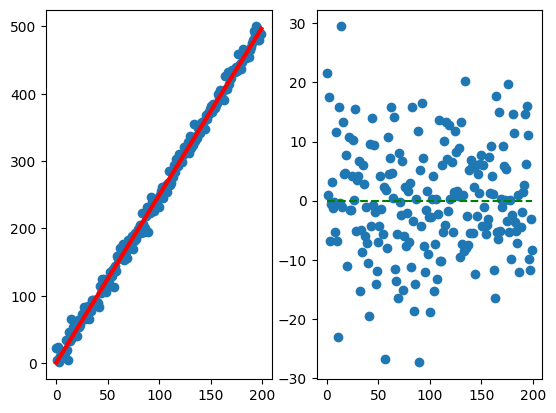

In [6]:
# read out the fitting parameters
inter, s = reg.params
line = s * x + inter
print('slope:\t', s)
print('inter:\t', inter)
print('r2 val:\t', reg.rsquared)

# plotting and comparison
f, (ax0, ax1) = plt.subplots(1, 2)
ax0.scatter(x, y)
ax0.plot(x, line, lw=3, color='red')

# plot the residuals
ax1.scatter(x, y-line)
ax1.plot(x, np.zeros_like(x), 'g--')

### Exercise 1 (total 3 points + 1 point bonus) : Fitting proportional samples

The above algorithms fit the underlying data columns by means of the least-square method. Show that if you fit two proportional samples, the slopes of the two fits has the same proportionality constant of the samples. Justify by showing the values of s and plotting. 

**Exercise 1.1 (1 point)** Define the data x, y, z: x are numbers from 0 to 200, y is the same as 1.5 * x - 2 plus a normal noise of modulus 10, z is 3 * y. 

In [7]:
x = np.arange(201)
y = 1.5 * x - 2 + np.random.normal(0, 10, x.shape)
z = 3 * y  


**Exercise 1.2 (1 point)**: Perform linear regression on your sample data by  fitting both y ~ x and z ~ x. Print respective slope,intercept and  fitting equations.

In [8]:

# Linear regression fit for y
slope_y, intercept_y, r_value_y, p_value_y, std_err_y = stats.linregress(x, y)

# Linear regression fit for z
slope_z, intercept_z, r_value_z, p_value_z, std_err_z = stats.linregress(x, z)

print(f"slope of y is: {slope_y}, intercept y is: {intercept_y}, fitting eq y is: y = {slope_y:.2f} * x + {intercept_y:.2f}")
print(f"slope of y is: {slope_z}, intercept y is: {intercept_z}, fitting eq y is: y = {slope_z:.2f} * x + {intercept_z:.2f}")


slope of y is: 1.4731008981548737, intercept y is: 2.087767945833633, fitting eq y is: y = 1.47 * x + 2.09
slope of y is: 4.419302694464619, intercept y is: 6.2633038375010415, fitting eq y is: y = 4.42 * x + 6.26
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


**Exercise 1.3 (1 points)**: Visualize your data overlaid with fitted lines( both y ~ x and z ~ x on the same plot) and their residual plots (again on the same plot). Plot the lengend.

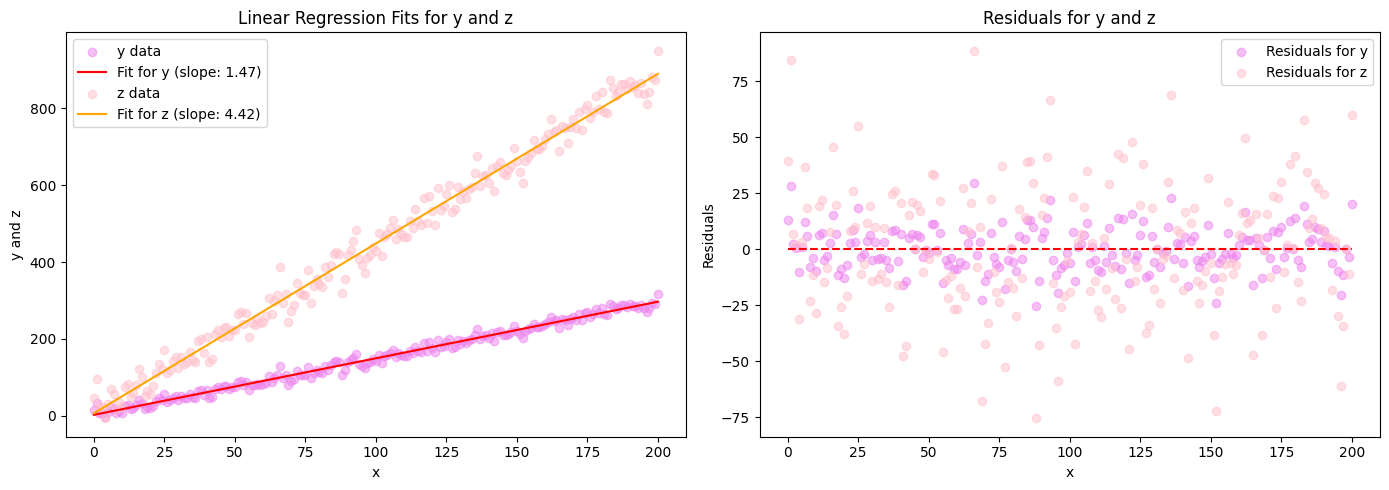

'the slope for y is 1.47, the slope for z is 4.42, and the ratio slope_z / slope_y is 3.00.'

In [9]:
#line
line_y = slope_y * x + intercept_y
line_z = slope_z * x + intercept_z

# residuals
residuals_y = y - line_y
residuals_z = z - line_z

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

#first
axes[0].scatter(x, y, label='y data', alpha=0.5, color='violet')
axes[0].plot(x, line_y, color='red', label=f'Fit for y (slope: {slope_y:.2f})')
axes[0].scatter(x, z, label='z data', alpha=0.5, color='pink')
axes[0].plot(x, line_z, color='orange', label=f'Fit for z (slope: {slope_z:.2f})')
axes[0].set_title('Linear Regression Fits for y and z')
axes[0].set_xlabel('x')
axes[0].set_ylabel('y and z')
axes[0].legend()

# second
axes[1].scatter(x, residuals_y, label='Residuals for y', alpha=0.5, color='violet')
axes[1].scatter(x, residuals_z, label='Residuals for z', alpha=0.5, color='pink')
axes[1].hlines(0, xmin=x.min(), xmax=x.max(), colors='red', linestyles='--')
axes[1].set_title('Residuals for y and z')
axes[1].set_xlabel('x')
axes[1].set_ylabel('Residuals')
axes[1].legend()

plt.tight_layout()
plt.show()


f"the slope for y is {slope_y:.2f}, the slope for z is {slope_z:.2f}, and the ratio slope_z / slope_y is {slope_z / slope_y:.2f}."

**Exercise 1.4 (1 point bouns):** What can you tell me about the value of the standard deviation of the 2 fits?  

In [10]:
# Calculate std
std_dev_residuals_y = np.sqrt(np.sum(residuals_y**2) / (len(x) - 2))
std_dev_residuals_z = np.sqrt(np.sum(residuals_z**2) / (len(x) - 2))

print(f"the std_dev_residuals_y is {std_dev_residuals_y:.2f}, the std_dev_residuals_z is {std_dev_residuals_z:.2f}, and the ratio slope_z / slope_y is {std_dev_residuals_z / std_dev_residuals_y:.2f}.")
print(f"the std of z is 3 times bigger than the std of y, which makes sense as we sampled the data this way.")

the std_dev_residuals_y is 9.57, the std_dev_residuals_z is 28.71, and the ratio slope_z / slope_y is 3.00.
the std of z is 3 times bigger than the std of y, which makes sense as we sampled the data this way.


### Data transformations
Nature likes power laws...

Often columns in the provided data are in fact correlated but the linear fitting requires to transform one or even both columns, e.g. through the **log-transformation**.

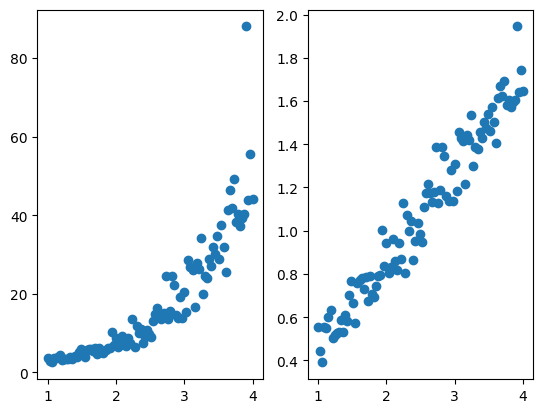

In [11]:
# an example case
x = np.linspace(1, 4, 100)
y = np.exp(x + np.random.normal(0, .2, x.shape))

fig, (ax0, ax1) = plt.subplots(1, 2)
ax0.scatter(x, y)
ax1.scatter(x, np.log10(y))

### Exercise 2 ( total 4 points): Combining transformations and linear regression

**Exercise 2.1 (1 point)**:Load the **bird_data_vincze_etal_2015.csv** dataset from the data folder as a pandas dataframe and examine the columns.

In [12]:
# Load the dataset
data = pd.read_csv('data/bird_data_vincze_etal_2015.csv')
data.describe()


,Migration distance,Body mass,Brain mass,Size of cerebellum,Size of telencephalon,Size of optic lobe,Wing aspect ratio,Wing area
count,152.000000,152.000000,152.000000,152.000000,152.000000,152.000000,91.000000,91.000000
mean,2208.464474,1746.874342,5.336224,0.637612,3.618500,0.356868,5.981209,0.088297
std,2391.028832,8069.652638,6.632211,0.854241,4.716583,0.324252,1.180264,0.118651
min,0.000000,5.400000,0.357000,0.035000,0.219000,0.041000,4.332000,0.006000
25%,0.000000,55.425000,1.171500,0.148750,0.729000,0.120750,5.042000,0.015000
50%,1373.350000,255.000000,3.260000,0.373000,2.007000,0.257500,5.841000,0.044000
75%,3592.900000,1062.500000,6.291000,0.703250,4.382250,0.449000,6.606500,0.098500
max,8465.800000,90000.000000,41.058000,6.055000,27.072000,1.788000,9.610000,0.662000


In [13]:
data.head()

,Species,Migration distance,Body mass,Brain mass,Size of cerebellum,Size of telencephalon,Size of optic lobe,Wing aspect ratio,Wing area
0,Accipiter gentilis,542.0,1100.0,7.674,1.088,4.617,0.837,5.841,0.193
1,Accipiter nisus,2938.1,260.0,3.081,0.499,1.593,0.440,5.891,0.093
2,Acrocephalus scirpaceus,3577.0,14.0,0.483,0.066,0.282,0.070,4.835,0.008
3,Aegithalos caudatus,26.1,7.5,0.456,0.035,0.283,0.059,4.463,0.007
4,Aegypius monachus,972.2,9000.0,24.808,2.812,17.936,1.020,NaN,NaN


**Exercise 2.2 (1 points)**: Plot the column pairs such as  **Brain mass** vs. **Wing area** and display visually. The perform a log10 tranformation on both the column and fit them. Display visually the result.

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 152 entries, 0 to 151
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Species                152 non-null    object 
 1   Migration distance     152 non-null    float64
 2   Body mass              152 non-null    float64
 3   Brain mass             152 non-null    float64
 4   Size of cerebellum     152 non-null    float64
 5   Size of telencephalon  152 non-null    float64
 6   Size of optic lobe     152 non-null    float64
 7   Wing aspect ratio      91 non-null     float64
 8   Wing area              91 non-null     float64
dtypes: float64(8), object(1)
memory usage: 10.8+ KB


**Exercise 2.3 (2 point)**:Show that if we invert the fit the result is different ( **Wing area** vs. **Brain mass**) by printing the **s** e **inter** values for both the fit and plotting the two fit on the same figure.

In [15]:
df_clean = data.dropna()

# Fit 1
slope_wa_bm, intercept_wa_bm, _, _, _ = stats.linregress(df_clean["Brain mass"], df_clean["Wing area"])

# Fit 2
slope_bm_wa, intercept_bm_wa, _, _, _ = stats.linregress(df_clean["Wing area"], df_clean["Brain mass"])

print("Wing area vs Brain mass")
print(f"slope is: {slope_wa_bm}, intercept is: {intercept_wa_bm}")

print("Brain mass vs Wing area")
print(f"slope is: {slope_bm_wa}, intercept is: {intercept_bm_wa}")



Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Wing area vs Brain mass
slope is: 0.027855804830740984, intercept is: -0.007185955184932757
Brain mass vs Wing area
slope is: 27.537770921908038, intercept is: 0.9962528642029551
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


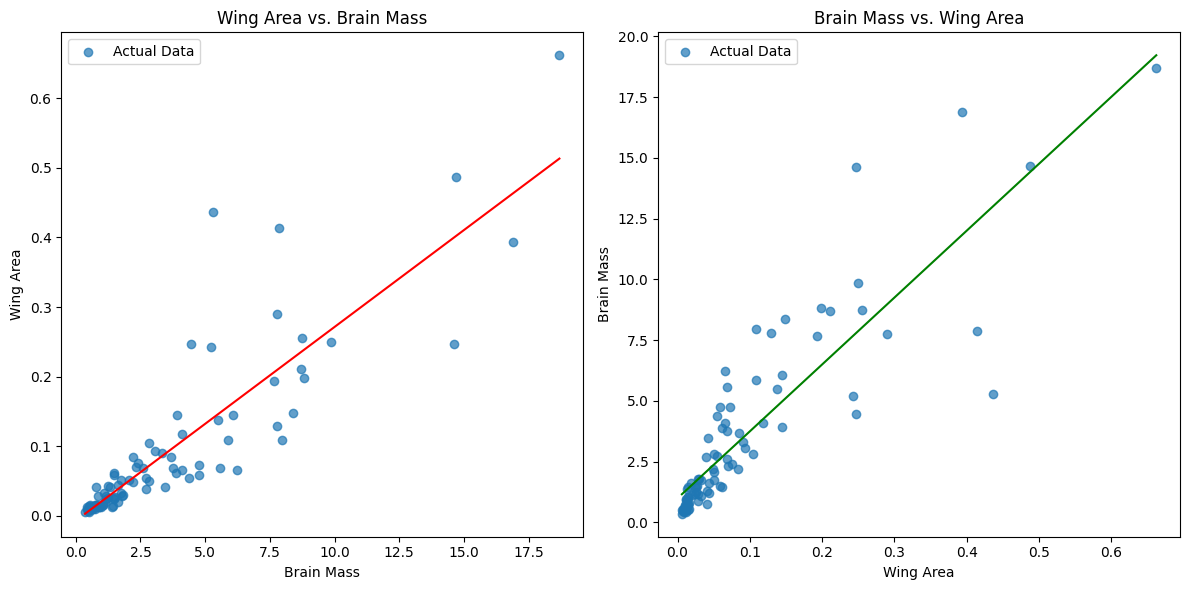

In [16]:

brain_mass_range = np.linspace(df_clean["Brain mass"].min(), df_clean["Brain mass"].max(), 100)
wing_area_range = np.linspace(df_clean["Wing area"].min(), df_clean["Wing area"].max(), 100)

line_wa_bm = slope_wa_bm * brain_mass_range + intercept_wa_bm
line_bm_wa = slope_bm_wa * wing_area_range + intercept_bm_wa

plt.figure(figsize=(12, 6))

# Plot Fit 1
plt.subplot(1, 2, 1)
plt.scatter(df_clean["Brain mass"], df_clean["Wing area"], label='Actual Data', alpha=0.7)
plt.plot(brain_mass_range, line_wa_bm, color='red')
plt.xlabel('Brain Mass')
plt.ylabel('Wing Area')
plt.title('Wing Area vs. Brain Mass')
plt.legend()

# Plot Fit 2
plt.subplot(1, 2, 2)
plt.scatter(df_clean["Wing area"], df_clean["Brain mass"], label='Actual Data', alpha=0.7)
plt.plot(wing_area_range, line_bm_wa, color='green')
plt.xlabel('Wing Area')
plt.ylabel('Brain Mass')
plt.title('Brain Mass vs. Wing Area')
plt.legend()

plt.tight_layout()
plt.show()

## Multiple linear regression
Let's now apply the same concepts to regress the best hyper-plane given three data columns.
The following example performs a 2-dimensional regression (using least-squares method) to fit
$z=a_{0} + a_{1}x + a_{2}y$

In [17]:
# set up some sample data
x = np.random.uniform(-5, 5, 100)
y = np.random.uniform(-5, 5, 100)
z = 0.5*x + 0.4*y + np.random.normal(0, 0.25, x.shape)
# collect them in a pandas dataframe
df = pd.DataFrame({'x': x,
                   'y': y,
                   'z': z})

# linear regression fit
reg = sm.ols(formula='z ~ x + y', data=df).fit()
print(reg.summary())

                            OLS Regression Results                            
Dep. Variable:                      z   R-squared:                       0.985
Model:                            OLS   Adj. R-squared:                  0.984
Method:                 Least Squares   F-statistic:                     3126.
Date:                Tue, 12 Mar 2024   Prob (F-statistic):           8.44e-89
Time:                        16:49:34   Log-Likelihood:                0.96901
No. Observations:                 100   AIC:                             4.062
Df Residuals:                      97   BIC:                             11.88
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0047      0.024      0.192      0.8

Since we are dealing with 3D data, we need to import additionally **Axes3D** from **mpl_toolkits.mplot3d**. This allows us to create 3D plots.

The fitting formula is: z = 0.005 + 0.494 x + 0.402 y


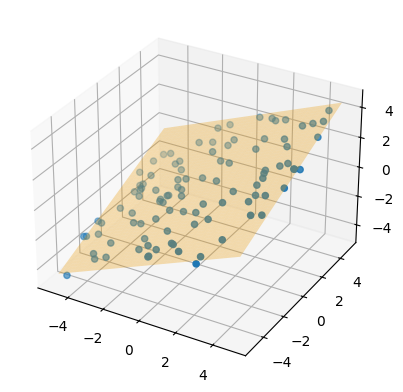

In [18]:
from mpl_toolkits.mplot3d import Axes3D
a0, a1, a2 = reg.params
print('The fitting formula is: z = {0:} + {1:} x + {2:} y'.format(round(a0, 3),round(a1, 3), round(a2, 3)))

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x, y, z)

# set up the surface plot
X = np.linspace(-5, 5, 100)
Y = np.linspace(-5, 5, 100)
XX, YY = np.meshgrid(X, Y)
ZZ = a0 + a1 * XX + a2 * YY
ax.plot_surface(XX, YY, ZZ, alpha=0.3, color='orange')
plt.show()

### Exercise 3 (total 3 points): Multiple linear regression

**Exercise 3.1 (1 point)**: Load the _data\_multiregr.csv_ from the data folder and examine the dataset. 

In [19]:
# Load the dataset
data = pd.read_csv('data/data_multiregr.csv')
data.head()

,Unnamed: 0,x,y,z
0,0,0.5,0.500000,0.882050
1,1,1.0,0.517588,1.535217
2,2,1.5,0.535176,1.608139
3,3,2.0,0.552764,1.816245
4,4,2.5,0.570352,1.955185


In [20]:
data.describe()

,Unnamed: 0,x,y,z
count,200.000000,200.000000,200.000000,200.000000
mean,99.500000,50.250000,2.250000,5.165134
std,57.879185,28.939592,1.017976,1.162407
min,0.000000,0.500000,0.500000,0.882050
25%,49.750000,25.375000,1.375000,4.549748
50%,99.500000,50.250000,2.250000,5.451125
75%,149.250000,75.125000,3.125000,6.017536
max,199.000000,100.000000,4.000000,6.931717


In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   x           200 non-null    float64
 2   y           200 non-null    float64
 3   z           200 non-null    float64
dtypes: float64(3), int64(1)
memory usage: 6.4 KB


**Exercise 3.2 (1 point)**: Make a scatter plot of __(x,y,z)__ after applying exp-transform to z values.

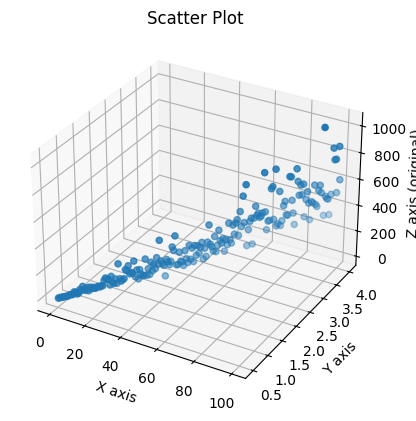

In [22]:
data["z_exp"]  = np.exp(data["z"])

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(data["x"], data["y"], data["z_exp"])

ax.set_title('Scatter Plot')
ax.set_xlabel('X axis')
ax.set_ylabel('Y axis')
ax.set_zlabel('Z axis (original)')

plt.show()

**Exercise 3.3 (1 points)**: Applying the techniques from above, fit the three datacolumns using multidimensional linear regression. Provide the scatter plot with fitted plane.

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


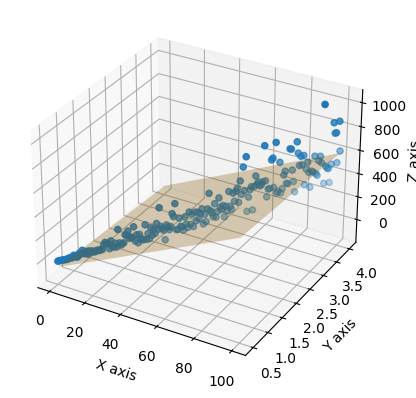

In [23]:
#reg
reg = sm.ols(formula='z_exp ~ x + y', data=data).fit()
a0, a1, a2 = reg.params.Intercept, reg.params.x, reg.params.y


X = np.linspace(min(data['x']), max(data['x']), 100)
Y = np.linspace(min(data['y']), max(data['y']), 100)
XX, YY = np.meshgrid(X, Y)
ZZ = a0 + a1 * XX + a2 * YY

# plot 
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(data['x'], data['y'], data['z_exp'])
ax.plot_surface(XX, YY, ZZ, alpha=0.3, color='orange')

ax.set_xlabel('X axis')
ax.set_ylabel('Y axis')
ax.set_zlabel('Z axis')

plt.show()